In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
from matplotlib.pyplot import yticks

In [2]:
df = pd.DataFrame(pd.read_csv("insurance.csv"))
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Checking Null values
df.isnull().sum()
# There are no NULL values in the dataset, hence it is clean.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.keys()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [11]:
auto = df

In [12]:
sex = pd.get_dummies(df['sex'], drop_first = True)
sex

,male
0,False
1,True
2,True
3,True
4,True
...,...
1333,True
1334,False
1335,False
1336,False


In [13]:
auto = pd.concat([auto, sex], axis = 1)
auto

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,True
4,32,male,28.880,0,no,northwest,3866.85520,True
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,True
1334,18,female,31.920,0,no,northeast,2205.98080,False
1335,18,female,36.850,0,no,southeast,1629.83350,False
1336,21,female,25.800,0,no,southwest,2007.94500,False


In [14]:
reg_typ = pd.get_dummies(auto['region'], drop_first = False)
reg_typ

,northeast,northwest,southeast,southwest
0,False,False,False,True
1,False,False,True,False
2,False,False,True,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
1333,False,True,False,False
1334,True,False,False,False
1335,False,False,True,False
1336,False,False,False,True


In [15]:
auto = pd.concat([auto, reg_typ], axis = 1)
auto

,age,sex,bmi,children,smoker,region,charges,male,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,False,False,False,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False,False,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False,False,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False,True,False,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,True,False,True,False,False
1334,18,female,31.920,0,no,northeast,2205.98080,False,True,False,False,False
1335,18,female,36.850,0,no,southeast,1629.83350,False,False,False,True,False
1336,21,female,25.800,0,no,southwest,2007.94500,False,False,False,False,True


In [16]:
smk_typ = pd.get_dummies(auto['smoker'], drop_first = False)
smk_typ

,no,yes
0,False,True
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
1333,True,False
1334,True,False
1335,True,False
1336,True,False


In [17]:
auto = pd.concat([auto, smk_typ], axis = 1)
auto

,age,sex,bmi,children,smoker,region,charges,male,northeast,northwest,southeast,southwest,no,yes
0,19,female,27.900,0,yes,southwest,16884.92400,False,False,False,False,True,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False,False,True,False,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False,False,True,False,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False,True,False,False,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,True,False,True,False,False,True,False
1334,18,female,31.920,0,no,northeast,2205.98080,False,True,False,False,False,True,False
1335,18,female,36.850,0,no,southeast,1629.83350,False,False,False,True,False,True,False
1336,21,female,25.800,0,no,southwest,2007.94500,False,False,False,False,True,True,False


In [18]:
auto

,age,sex,bmi,children,smoker,region,charges,male,northeast,northwest,southeast,southwest,no,yes
0,19,female,27.900,0,yes,southwest,16884.92400,False,False,False,False,True,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False,False,True,False,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False,False,True,False,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False,True,False,False,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,True,False,True,False,False,True,False
1334,18,female,31.920,0,no,northeast,2205.98080,False,True,False,False,False,True,False
1335,18,female,36.850,0,no,southeast,1629.83350,False,False,False,True,False,True,False
1336,21,female,25.800,0,no,southwest,2007.94500,False,False,False,False,True,True,False


In [19]:
auto.drop(['sex','region','smoker'], axis = 1, inplace = True)

In [20]:
auto

,age,bmi,children,charges,male,northeast,northwest,southeast,southwest,no,yes
0,19,27.900,0,16884.92400,False,False,False,False,True,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False,True,False
4,32,28.880,0,3866.85520,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False,True,False
1334,18,31.920,0,2205.98080,False,True,False,False,False,True,False
1335,18,36.850,0,1629.83350,False,False,False,True,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True,True,False


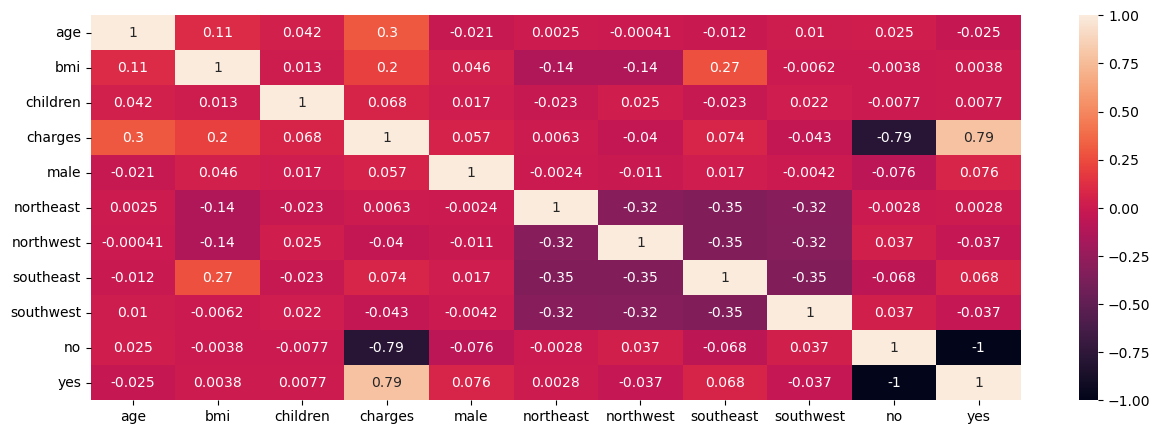

In [21]:
# Starting machine learning
import seaborn as sns
plt.figure(figsize=(15,5))
sns.heatmap(auto.corr(),annot=True)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(auto, train_size = 0.7, test_size = 0.3, random_state = 1)

In [23]:
df_train

,age,bmi,children,charges,male,northeast,northwest,southeast,southwest,no,yes
744,50,26.410,0,8827.20990,True,False,True,False,False,True,False
363,21,26.400,1,2597.77900,False,False,False,False,True,True,False
10,25,26.220,0,2721.32080,True,True,False,False,False,True,False
970,50,28.160,3,10702.64240,False,False,False,True,False,True,False
634,51,39.700,1,9391.34600,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
715,60,28.900,0,12146.97100,True,False,False,False,True,True,False
905,26,29.355,2,4564.19145,False,True,False,False,False,True,False
1096,51,34.960,2,44641.19740,False,True,False,False,False,False,True
235,40,22.220,2,19444.26580,False,False,False,True,False,False,True


In [24]:
df_test

,age,bmi,children,charges,male,northeast,northwest,southeast,southwest,no,yes
559,19,35.530,0,1646.42970,True,False,True,False,False,True,False
1087,57,31.540,0,11353.22760,True,False,True,False,False,True,False
1020,51,37.000,0,8798.59300,True,False,False,False,True,True,False
460,49,36.630,3,10381.47870,False,False,False,True,False,True,False
802,21,22.300,1,2103.08000,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
323,57,40.945,0,11566.30055,True,True,False,False,False,True,False
1268,20,33.300,0,1880.48700,False,False,False,False,True,True,False
134,20,28.785,0,2457.21115,False,True,False,False,False,True,False
1274,26,27.060,0,17043.34140,True,False,False,True,False,False,True


In [25]:
list(auto.keys())

['age',
 'bmi',
 'children',
 'charges',
 'male',
 'northeast',
 'northwest',
 'southeast',
 'southwest',
 'no',
 'yes']

In [26]:
from sklearn.linear_model import LinearRegression
X_train = df_train[['age','bmi','children','male', 'northeast','northwest','southeast', 'southwest' ,'no','yes']]
y_train = df_train[[ 'charges']]
# # df_test_predict = X_train.iloc[0:1]

In [27]:
X_train

,age,bmi,children,male,northeast,northwest,southeast,southwest,no,yes
744,50,26.410,0,True,False,True,False,False,True,False
363,21,26.400,1,False,False,False,False,True,True,False
10,25,26.220,0,True,True,False,False,False,True,False
970,50,28.160,3,False,False,False,True,False,True,False
634,51,39.700,1,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...
715,60,28.900,0,True,False,False,False,True,True,False
905,26,29.355,2,False,True,False,False,False,True,False
1096,51,34.960,2,False,True,False,False,False,False,True
235,40,22.220,2,False,False,False,True,False,False,True


In [28]:
y_train

,charges
744,8827.20990
363,2597.77900
10,2721.32080
970,10702.64240
634,9391.34600
...,...
715,12146.97100
905,4564.19145
1096,44641.19740
235,19444.26580


In [29]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [30]:
# Testing
data = df_test.iloc[10:11]
actual_expenses = data.pop('charges')

print(data)
predicted_expenses = model.predict(data)
print("Actual expenses",actual_expenses)
print("predicted expenses",predicted_expenses)

# print(df_test.iloc[0:1])

    age    bmi  children   male  northeast  northwest  southeast  southwest  \
48   60  24.53         0  False      False      False       True      False   

      no    yes  
48  True  False  
Actual expenses 48    12629.8967
Name: charges, dtype: float64
predicted expenses [[11030.53618402]]
